Goal 10: Reduce inequality within and among countries

<small> SDG INDICATOR 10.2.1 <br>
<b>People living below 50 per cent of median income</b>

*Definition*: Indicator 10.2.1 is the proportion of people living below 50 per cent of median income, by sex, age and persons with disabilities.

*Goal*: By 2030, empower and promote the social, economic and political inclusion of all, irrespective of age, sex, disability, race, ethnicity, origin, religion or economic or other status. <small/>

In [49]:
import pandas as pd
import csv
    

In [50]:
df = pd.read_csv('poverty_data.csv')

In [51]:
df.columns
    

Index(['country', 'year', 'reporting_level', 'welfare_type', 'ppp_version',
       'survey_year', 'survey_comparability',
       'headcount_ratio_international_povline',
       'headcount_ratio_lower_mid_income_povline',
       'headcount_ratio_upper_mid_income_povline',
       ...
       'decile8_thr', 'decile9_thr', 'gini', 'mld', 'polarization',
       'palma_ratio', 's80_s20_ratio', 'p90_p10_ratio', 'p90_p50_ratio',
       'p50_p10_ratio'],
      dtype='object', length=108)

In [52]:
variables = pd.read_csv('poverty_variables.csv')
 
    
variables

#Variables to excel
variables.to_excel('poverty_variables.xlsx', index=False)
    


ModuleNotFoundError: No module named 'openpyxl'

In [53]:
#reporting level might be a national, rural or urban. I will be looking at the national level
df.reporting_level.unique()
    

array(['national', 'urban', 'rural', nan], dtype=object)

In [54]:
df = df[df.reporting_level == 'national']
df.reporting_level.unique()

array(['national'], dtype=object)

In [55]:
df

,country,year,reporting_level,welfare_type,ppp_version,survey_year,survey_comparability,headcount_ratio_international_povline,headcount_ratio_lower_mid_income_povline,headcount_ratio_upper_mid_income_povline,...,decile8_thr,decile9_thr,gini,mld,polarization,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio
0,Albania,1996,national,consumption,2011,1996.0,0.0,0.920669,11.174149,44.618417,...,8.85,10.92,0.270103,0.119104,0.241293,0.928335,3.945872,3.568627,1.889273,1.888889
1,Albania,2002,national,consumption,2011,2002.0,1.0,1.570843,14.132118,49.669635,...,8.83,11.58,0.317390,0.164812,0.268982,1.215056,4.831625,3.979381,2.090253,1.903780
2,Albania,2005,national,consumption,2011,2005.0,1.0,0.860527,8.715685,38.545254,...,10.02,12.78,0.305957,0.154413,0.254529,1.142718,4.662236,3.872727,1.978328,1.957576
3,Albania,2008,national,consumption,2011,2008.0,1.0,0.313650,5.250542,31.110345,...,10.74,13.62,0.299847,0.148893,0.247311,1.114657,4.395911,3.574803,1.956897,1.826772
4,Albania,2012,national,consumption,2011,2012.0,1.0,0.849754,6.182414,34.528906,...,10.52,13.26,0.289605,0.138417,0.249988,1.041193,4.272573,3.632877,1.941435,1.871233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4872,Zambia,2010,national,consumption,2017,2010.0,4.0,68.456606,82.885088,93.044964,...,3.27,5.34,0.556215,0.539135,0.536149,4.278696,16.024650,10.470588,3.955556,2.647059
4873,Zambia,2015,national,consumption,2017,2015.0,4.0,61.352160,77.548045,90.747141,...,4.02,6.43,0.571361,0.604667,0.613181,4.995829,21.243915,13.978261,4.095541,3.413043
4874,Zimbabwe,2011,national,consumption,2017,2011.0,0.0,21.580063,47.857143,77.945113,...,7.25,10.54,0.431536,0.311153,0.388356,2.207938,8.526847,6.713376,2.773684,2.420382
4875,Zimbabwe,2017,national,consumption,2017,2017.0,0.0,34.206046,61.583570,84.109019,...,5.96,8.81,0.443371,0.322848,0.416694,2.307359,8.569542,6.574627,3.069686,2.141791


In [56]:
#check survey comparability for a given country
def survey_comparability(country):
    return df[df.country == country].survey_comparability.unique()

survey_comparability('Turkey')


array([0., 1.])

## Exploratory Data Analysis

1. Observe the dataset

2. Check for missing values

3. Categorize the values    

<small> 

*Categorical:* Categorical variables can have a set number of values.

*Continuous:* Continuous variables can have an infinite number of values.

*Discrete:* Discrete variables can have a set number of values that must be numeric.

</small>

4-) Shape of the data

5-) Relationship between variables

6-) Outliers

# Predictive Analytics


In [57]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

#check survey comparability for a given country
def survey_comparability(country):
    return df[df.country == country].survey_comparability.unique()

survey_comparability('Turkey')

#predict gini by poverty headcount ratio
X = df[['headcount_ratio_1000']]
y = df[['gini']]


#Drop NaN values
X = X.dropna()
y = y.fillna(y.mean())

#Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.metrics import mean_squared_error, r2_score
#Forecast time series using linear regression
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
        % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))
        


Coefficients: 
 [[0.00107904]]
Mean squared error: 0.01
Variance score: 0.22


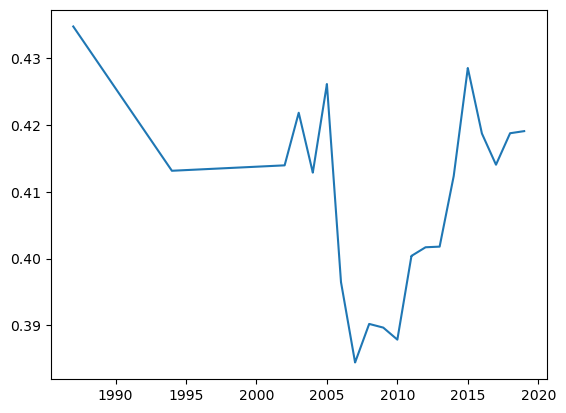

In [58]:
#One hot encoding except for the country variable
categorical_variables = df.select_dtypes(include=['object']).columns
categorical_variables = categorical_variables.drop('country')
df = pd.get_dummies(df, columns=categorical_variables, drop_first=True)
df

  
    
#For Turkey only
df_tr = df[df.country == 'Turkey']
#Order by year
df_tr = df_tr.sort_values(by=['year'])
#plot gini  
plt.plot(df_tr.year, df_tr.gini)


    

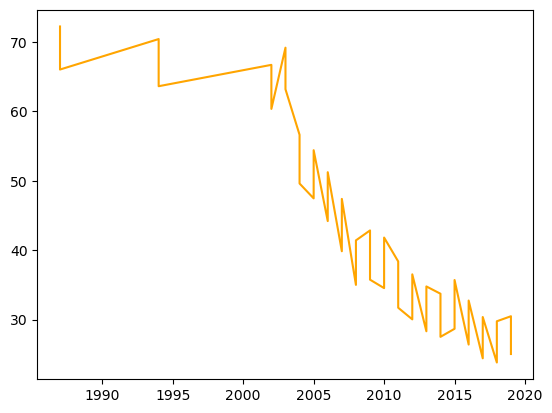

In [59]:
#plot poverty headcount ratio
plt.plot(df_tr.year, df_tr.headcount_ratio_1000, color='orange')

Exclude last 5 years from the dataset for testing purposes

Coefficients: 
 [[0.0002285]]
Mean squared error: 0.00
Variance score: -1.05
Coefficients: 
 [[ 0.00000000e+00 -3.36967980e-03  3.81023902e-05]]
Mean squared error: 0.00
Variance score: -0.20


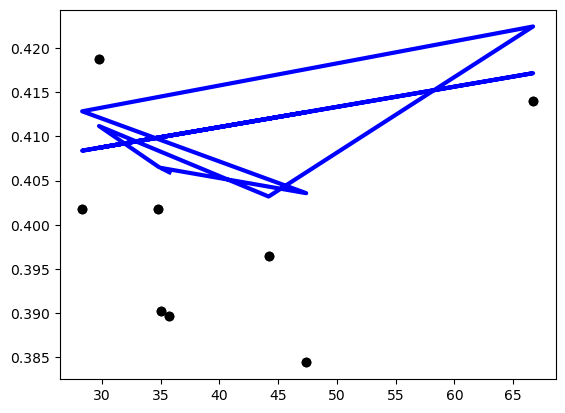

In [60]:
#exclude last 5 years from the dataset for testing purposes
#df_tr = df_tr[:-5]

#predict gini by poverty headcount ratio
X = df_tr[['headcount_ratio_1000']]
y = df_tr[['gini']] 

#Drop NaN values
X = X.dropna()
y = y.fillna(y.mean())

#Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Forecast time series using linear regression
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
        % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction 
print('Variance score: %.2f' % r2_score(y_test, y_pred))

#Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)


#it is non-linear so I will try polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#Forecast time series using polynomial regression
model = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# The polynomial coefficients
print('Coefficients: \n', model.steps[1][1].coef_)
# The mean squared error
print("Mean squared error: %.2f"
        % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))
    

#Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)



Epoch 1/100
24/24 - 1s - loss: 0.2031 - 1s/epoch - 57ms/step
Epoch 2/100
24/24 - 0s - loss: 0.1771 - 154ms/epoch - 6ms/step
Epoch 3/100
24/24 - 0s - loss: 0.1558 - 123ms/epoch - 5ms/step
Epoch 4/100
24/24 - 0s - loss: 0.1372 - 80ms/epoch - 3ms/step
Epoch 5/100
24/24 - 0s - loss: 0.1203 - 78ms/epoch - 3ms/step
Epoch 6/100
24/24 - 0s - loss: 0.1070 - 78ms/epoch - 3ms/step
Epoch 7/100
24/24 - 0s - loss: 0.0955 - 78ms/epoch - 3ms/step
Epoch 8/100
24/24 - 0s - loss: 0.0856 - 79ms/epoch - 3ms/step
Epoch 9/100
24/24 - 0s - loss: 0.0778 - 78ms/epoch - 3ms/step
Epoch 10/100
24/24 - 0s - loss: 0.0711 - 78ms/epoch - 3ms/step
Epoch 11/100
24/24 - 0s - loss: 0.0658 - 81ms/epoch - 3ms/step
Epoch 12/100
24/24 - 0s - loss: 0.0622 - 78ms/epoch - 3ms/step
Epoch 13/100
24/24 - 0s - loss: 0.0585 - 79ms/epoch - 3ms/step
Epoch 14/100
24/24 - 0s - loss: 0.0561 - 82ms/epoch - 3ms/step
Epoch 15/100
24/24 - 0s - loss: 0.0544 - 77ms/epoch - 3ms/step
Epoch 16/100
24/24 - 0s - loss: 0.0523 - 83ms/epoch - 3ms/step


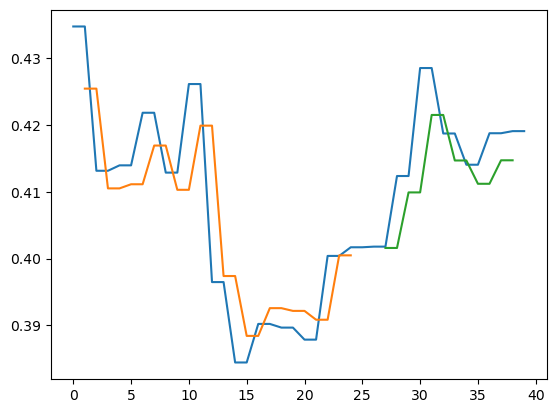

In [61]:
#LSTM to predict gini
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error

#Forecast time series using LSTM
# fix random seed for reproducibility
np.random.seed(7)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df_tr[['gini']])
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
    

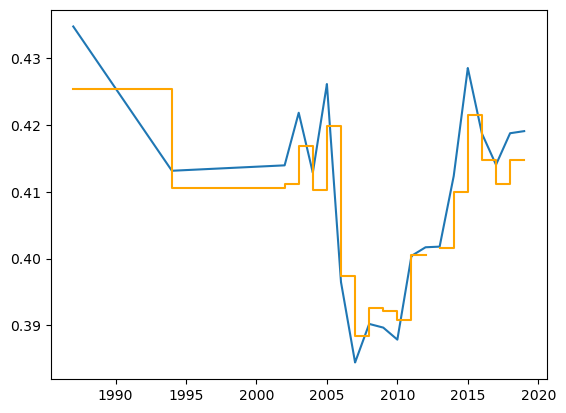

In [63]:
#Blue is the actual gini, orange is the predicted gini  
plt.plot(df_tr.year, df_tr.gini)
plt.plot(df_tr.year, trainPredictPlot, color='orange')
plt.plot(df_tr.year, testPredictPlot, color='orange')






1/1 [==============================] - 0s 22ms/step


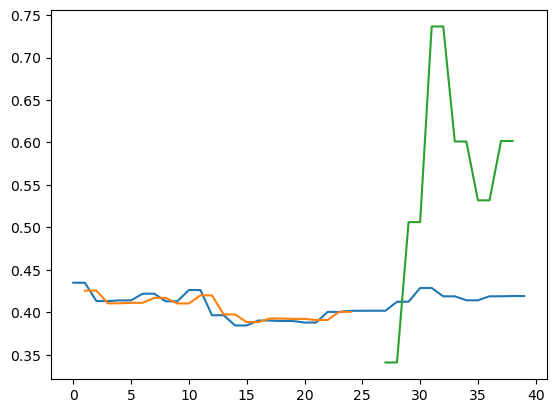

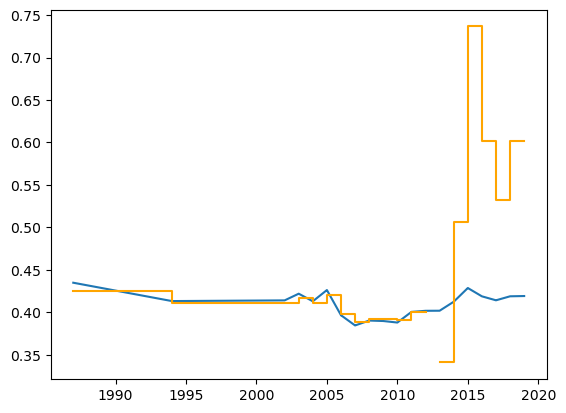

In [66]:
#predict for the next 5 years using teh LSTM
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)

#shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#Blue is the actual gini, orange is the predicted gini
plt.plot(df_tr.year, df_tr.gini)
plt.plot(df_tr.year, trainPredictPlot, color='orange')
plt.plot(df_tr.year, testPredictPlot, color='orange')
    

    